In [1]:
import numpy as np
import pandas as pd

In [2]:
f = open("spambase.names", "r")
lines = f.readlines()
line=[]
columns=[]
line = lines[-57:]

for x in line :
        k = x.split(':')
        columns.append(k[0])
columns.append('Class')
print(columns)
f.close()

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [3]:
data = pd.read_csv('spambase.data',header = None,names = columns)


In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [6]:
data.isnull().values.any()

False

In [7]:
to_change_dtype = ['capital_run_length_average','capital_run_length_longest','capital_run_length_total','Class'] 

In [8]:
data[to_change_dtype] = data[to_change_dtype].astype(float)

In [9]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import f1_score

In [12]:
X = np.asarray(data[columns[:-1]])
Y = np.asarray(data[columns[-1:]]).reshape(-1,)

In [14]:
# normalizing X vector
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 4)

In [17]:
clf = svm.SVC() # default C = 1 and kernel = 'rbf'
clf.fit(x_train,y_train)
y_hat = clf.predict(x_test)
f1_score(y_test,y_hat,average= 'weighted')

0.9279999087976117

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
ls = list(range(1,1001,10))
new_ls = list(range(1,15))

In [20]:
rbf_ls = []
for i in ls:
    clf = svm.SVC(C = i,kernel = 'rbf')
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    rbf_ls.append(f1_score(y_test,y_hat,average= 'weighted'))

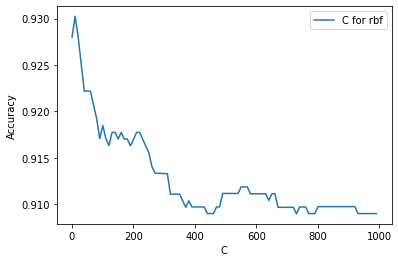

In [21]:
p = sns.lineplot(x = ls,y = rbf_ls,label = 'C for rbf');
p.set(xlabel = 'C',ylabel = 'Accuracy');

In [22]:
rbf_ls = []
for i in new_ls:
    clf = svm.SVC(C = i,kernel = 'rbf')
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    rbf_ls.append(f1_score(y_test,y_hat,average= 'weighted'))

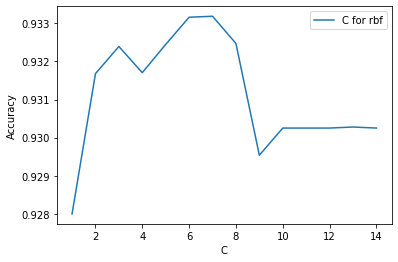

In [24]:
p_new = sns.lineplot(x = new_ls,y = rbf_ls,label = 'C for rbf');
p_new.set(xlabel = 'C',ylabel = 'Accuracy');

In [29]:
best_rbf_C = new_ls[rbf_ls.index(max(rbf_ls))]
print(f'Best Value of C for maximum accuracy in rbf kernel is: {best_rbf_C}')
print(f'Best Accuracy achieved for rbf kernel: {max(rbf_ls)}')
# 7 0.9331840078381469

Best Value of C for maximum accuracy in rbf kernel is: 7
Best Accuracy achieved for rbf: 0.9331840078381469


In [ ]:
linear_ls = []
for i in ls:
    clf2 = svm.SVC(C = i,kernel = 'linear')
    clf2.fit(x_train,y_train)
    y2_hat = clf2.predict(x_test)
    linear_ls.append(f1_score(y_test,y2_hat,average= 'weighted'))

In [ ]:
p2 = sns.lineplot(x = ls,y = linear_ls,label = 'C for linear');
p2.set(xlabel = 'C',ylabel = 'Accuracy');

In [35]:
linear_ls = []
for i in new_ls:
    clf2 = svm.SVC(C = i,kernel = 'linear')
    clf2.fit(x_train,y_train)
    y2_hat = clf2.predict(x_test)
    linear_ls.append(f1_score(y_test,y2_hat,average= 'weighted'))

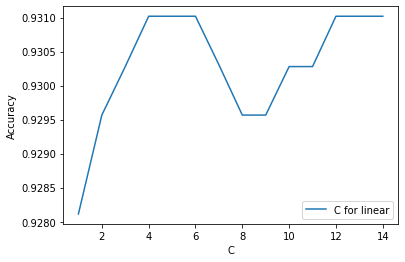

In [36]:
p2_new = sns.lineplot(x = new_ls,y = linear_ls,label = 'C for linear');
p2_new.set(xlabel = 'C',ylabel = 'Accuracy');

In [ ]:
best_linear_C = ls[linear_ls.index(max(linear_ls))]
print(f'Best Value of C for maximum accuracy in linear kernel is: {best_linear_C}')
print(f'Best Accuracy achieved for linear kernel: {max(linear_ls)}')
# 21 0.931731486269411

In [30]:
quad_ls = []
for i in ls:
    clf3 = svm.SVC(C = i,kernel = 'poly',degree = 2)
    clf3.fit(x_train,y_train)
    y3_hat = clf3.predict(x_test)
    quad_ls.append(f1_score(y_test,y3_hat,average= 'weighted'))

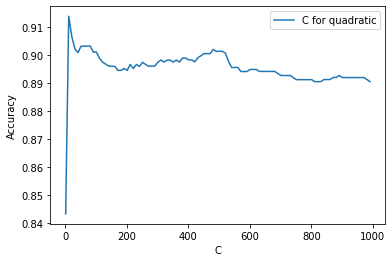

In [31]:
p3 = sns.lineplot(x = ls,y = quad_ls,label = 'C for quadratic');
p3.set(xlabel = 'C',ylabel = 'Accuracy');

In [32]:
quad_ls = []
for i in new_ls:
    clf3 = svm.SVC(C = i,kernel = 'poly',degree = 2)
    clf3.fit(x_train,y_train)
    y3_hat = clf3.predict(x_test)
    quad_ls.append(f1_score(y_test,y3_hat,average= 'weighted'))

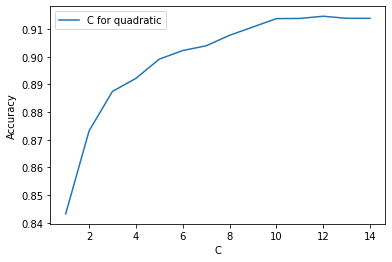

In [33]:
p3_new = sns.lineplot(x = new_ls,y = quad_ls,label = 'C for quadratic');
p3_new.set(xlabel = 'C',ylabel = 'Accuracy');

In [34]:
best_quad_C = new_ls[quad_ls.index(max(quad_ls))]
print(f'Best Value of C for maximum accuracy in quadratic kernel is: {best_quad_C}')
print(f'Best Accuracy achieved for quadratic kernel: {max(quad_ls)}')
# 12 0.9146181157451513

Best Value of C for maximum accuracy in quadratic kernel is: 12
Best Accuracy achieved for quadratic kernel: 0.9146181157451513
